In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def preprocess_data(data):
    data['Gender'] = data['Sex'].astype('category').cat.codes
    data.drop(['Sex', 'Name'], axis=1, inplace=True)
    
    data.fillna(data.mean(), inplace=True)

    features = ['Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
    data[features] = (data[features] - data[features].mean()) / data[features].std()
    
    return data.drop('Survived', axis=1).values.T, data['Survived'].values.reshape(1, -1)

def initialize_parameters(n):
    W = np.zeros((n, 1))
    b = 0
    return W, b


In [30]:
def train(X, Y, W, b, learning_rate, epochs, regularization_lambda=0.1):
    m = X.shape[1]
    cost_history = []

    for epoch in range(epochs):
        Z = np.dot(W.T, X) + b
        A = sigmoid(Z)
        cost = - (1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
        
        reg_term = (regularization_lambda / (2 * m)) * np.sum(np.square(W))
        cost += reg_term

        dZ = A - Y
        dW = (1 / m) * np.dot(X, dZ.T) + (regularization_lambda / m) * W
        db = (1 / m) * np.sum(dZ)

        W -= learning_rate * dW
        b -= learning_rate * db

        cost_history.append(cost)

    return W, b, cost_history

def predict(X, W, b):
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    return A > 0.5

def accuracy(predictions, labels):
    return (1 - np.sum(np.abs(predictions - labels)) / labels.shape[1]) * 100

def plot_predictions(predicted_prob, actual_values, title, color):
    plt.scatter(predicted_prob, actual_values, color=color)
    plt.xlabel("Predicted Probabilities")
    plt.ylabel("Actual Values")
    plt.title(title)
    plt.show()

Accuracy on the training set: 79.38%


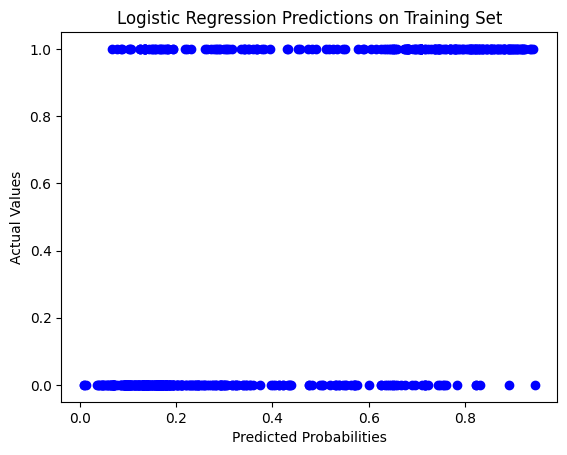

In [31]:
# Load the training dataset
train_data = pd.read_csv("/home/gllaizz/Downloads/train(1).csv")

# Preprocess the data
x_train, y_train = preprocess_data(train_data)

# Initialize parameters
W, b = initialize_parameters(x_train.shape[0])

# Train the logistic regression model
epochs = 200000
learning_rate = 0.001
regularization_lambda = 0.1
W, b, cost_history = train(x_train, y_train, W, b, learning_rate, epochs, regularization_lambda)

# Evaluate accuracy on the training set
train_predictions = predict(x_train, W, b)
train_accuracy = accuracy(train_predictions, y_train)
print("Accuracy on the training set: {:.2f}%".format(train_accuracy))

# Plot the predicted probabilities vs. actual values on the training set
plot_predictions(sigmoid(np.dot(W.T, x_train) + b), y_train, "Logistic Regression Predictions on Training Set", "blue")
